In [1]:
# Importing libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mp 
# use the inline backend to generate the plots within the browser
%matplotlib inline   
print('matplotlib version: ',mp.__version__)


matplotlib version:  3.9.2


In [2]:
# Fetching Data 
import requests 
import io
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
response = requests.get(URL)
response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

# Read the content into a pandas DataFrame using io.StringIO
df = pd.read_csv(io.StringIO(response.text))

# You can then display the head of the DataFrame to verify
df.head()



,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
# print the dimensions of the dataframe
df.shape

(195, 39)

In [4]:
# Set the country name as index - useful for quickly looking up countries using .loc method.
df.set_index('Country', inplace = True)


In [5]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# finally, let's create a list of years from 1980 - 2013
years = list(map(str, range(1980, 2014)))
print(type(years))
years

<class 'list'>


['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [7]:
yr = np.arange(1980, 2014)
print(type(yr))
print(yr.dtype)
yr

<class 'numpy.ndarray'>
int64


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [8]:
# Line Plot
"""
A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.

Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.
We need the Total of year-wise immigrants,

We will create a new dataframe for only columns containing the years
then, we will apply sum() on the dataframe

You can do create a line plot directly on axes by calling plot function plot()
"""
#creating df with only years columns from 1980 - 2013
df_years = df[years]

#Applying sum to get total immigrants year-wise
total_immigrents = df_years.sum()

total_immigrents


1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

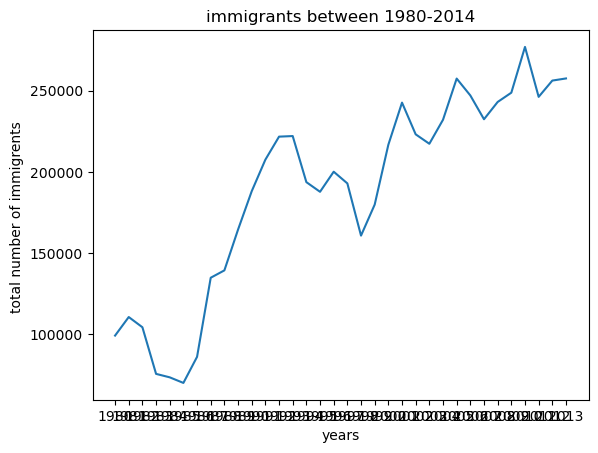

In [9]:
#Create figure and axes

fig, ax = plt.subplots()

#plot the line 
ax.plot(total_immigrents)
ax.set_title("immigrants between 1980-2014")
ax.set_xlabel("years")
ax.set_ylabel("total number of immigrents ")

plt.show()

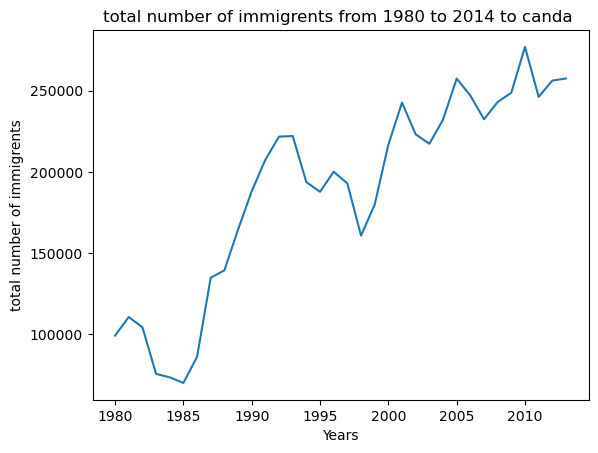

In [10]:
"""
The plot function populated the x-axis with the index values (years), and the y-axis with the column values (population).
However, notice how the years were not displayed because they are of type string.

Therefore, let's change the type of the index values to integer for plotting.¶
"""
fig, ax = plt.subplots()

total_immigrents.index = total_immigrents.index.map(int)

ax.plot(total_immigrents)
ax.set_title("total number of immigrents from 1980 to 2014 to canda ")
ax.set_xlabel("Years")
ax.set_ylabel("total number of immigrents")

plt.show()

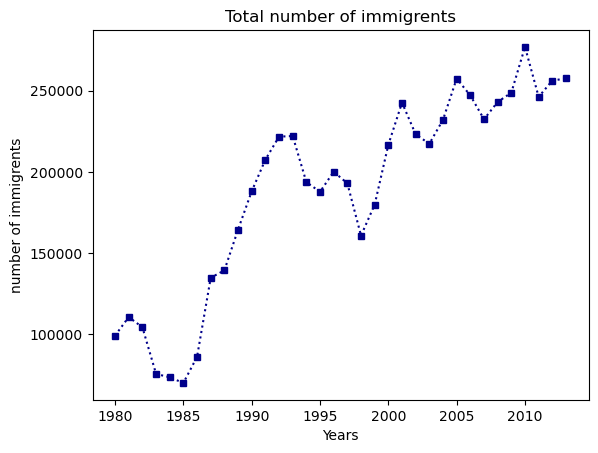

In [11]:
#Let's now customize the above plot's appearance¶

fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrents.index = total_immigrents.index.map(int)

ax.plot(total_immigrents, 
        marker ='s',  #Including markers in squares shapes
        markersize = 5, #Setting the size of the marker
        color = 'darkblue',
        linestyle = 'dotted')

ax.set_title("Total number of immigrents")
ax.set_xlabel("Years")
ax.set_ylabel("number of immigrents")

plt.show()



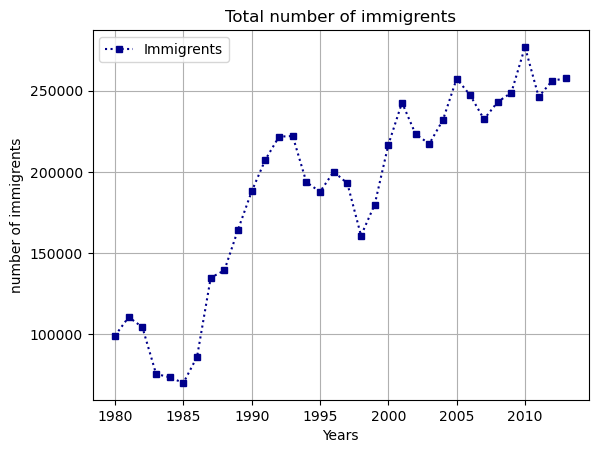

In [12]:
# Let's include the background grid, a legend and try to change the limits on the axis¶

fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrents.index = total_immigrents.index.map(int)

ax.plot(total_immigrents, 
        marker ='s',  #Including markers in squares shapes
        markersize = 5, #Setting the size of the marker
        color = 'darkblue',
        linestyle = 'dotted')


ax.set_title("Total number of immigrents")
ax.set_xlabel("Years")
ax.set_ylabel("number of immigrents")


plt.xlim = (1975,2015)
plt.grid(True)
plt.legend(["Immigrents"])
plt.show()



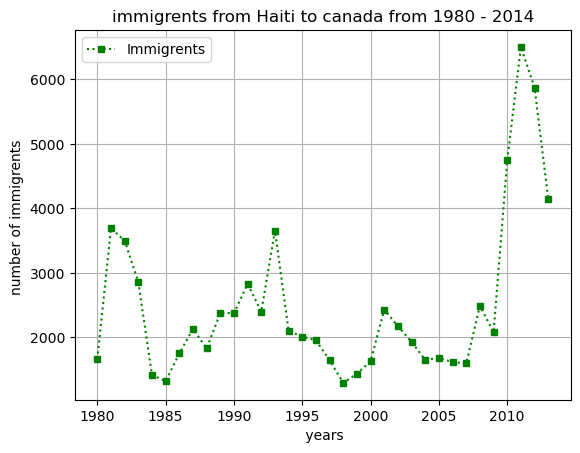

In [13]:
# Question: Plot a line graph of immigration from Haiti¶

df_Haiti = df.loc[['Haiti'], years].transpose()
df_Haiti.head()
df_Haiti.index = df_Haiti.index.map(int)

fig, ax = plt.subplots()

ax.plot(df_Haiti, linestyle = 'dotted', marker = 's', markersize = 5, color = 'green')
ax.set_title("immigrents from Haiti to canada from 1980 - 2014")
ax.set_xlabel(" years")
ax.set_ylabel("number of immigrents ")

plt.legend(["Immigrents"])
plt.grid(True)
plt.show()

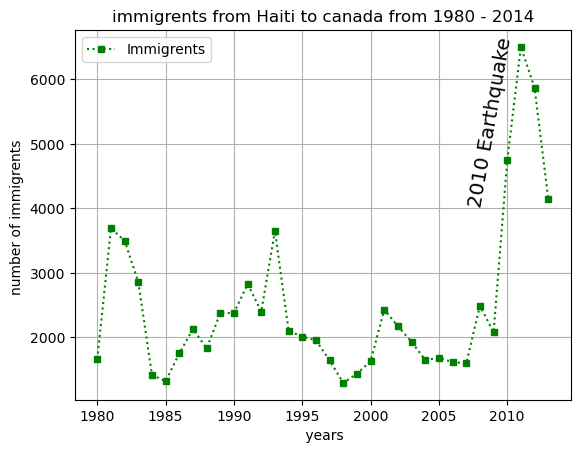

In [14]:
# We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti.
# Let's annotate this spike in the plot by using the ax.annotate() method.

# Question: Plot a line graph of immigration from Haiti¶

df_Haiti = df.loc[['Haiti'], years].transpose()
df_Haiti.head()
df_Haiti.index = df_Haiti.index.map(int)

fig, ax = plt.subplots()

ax.plot(df_Haiti, linestyle = 'dotted', marker = 's', markersize = 5, color = 'green')
ax.set_title("immigrents from Haiti to canada from 1980 - 2014")
ax.set_xlabel(" years")
ax.set_ylabel("number of immigrents ")
ax.annotate("2010 Earthquake", xy=(2007, 4000), rotation =80, va ='bottom', ha ='left', fontsize = 'x-large') 
             

plt.legend(["Immigrents"])
plt.grid(True)
plt.show()

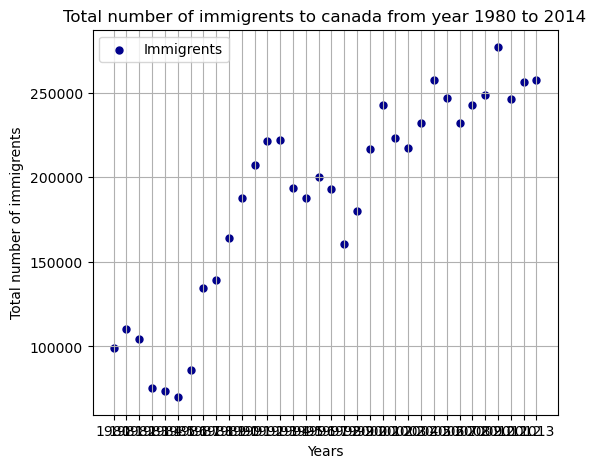

In [15]:
# Scatter plot
"""
A scatter plot visualizes the relationship between two continuous variables, displaying individual data points as dots on a 
two-dimensional plane, allowing for the examination of patterns, clusters, and correlations.

Let's created a Scatter plot to visualize the immigrants (to Canada) trend during 1980 to 2013.
We need the Total of year-wise immigrants,

We will create a new dataframe for only columns containing the years
then, we will apply sum() on the dataframe

You can do create a scatter plot directly on ax by calling plot function scatter()
"""
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(years, total_immigrents, marker = 'o', s = 25, color = 'darkblue')
ax.set_title("Total number of immigrents to canada from year 1980 to 2014")
ax.set_xlabel("Years")
ax.set_ylabel("Total number of immigrents")
ax.legend(["Immigrents"])


plt.grid(True)
plt.show()

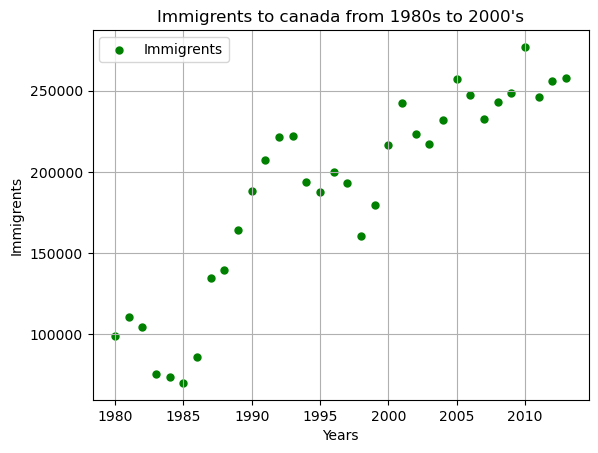

In [16]:
total_immigrents.index = total_immigrents.index.map(int)

fig, ax = plt.subplots()

ax.scatter(total_immigrents.index, total_immigrents, marker = 'o', s = 25, color = 'green')
ax.set_title("Immigrents to canada from 1980s to 2000's")
ax.set_xlabel("Years")
ax.set_ylabel("Immigrents")
ax.legend(["Immigrents"])


plt.grid(True)
plt.show()

In [17]:
# Bar Plot

"""
A bar plot represents categorical data with rectangular bars, where the height of each bar corresponds to the value of a specific category,
making it suitable for comparing values across different categories.

Let's create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013.

Apply sort_values function on the 'Total' column of our data

We will create a new dataframe for only columns containing the years
then, we will apply sum() on the dataframe and can create a separatedataframe for top five countries

You can further use the names of the countries to label each bar on the plot
"""
#Sorting the dataframe on 'Total' in descending order
df.sort_values(["Total"], ascending = False, axis = 0, inplace = True)

# get the top 5 entries with head function
top_5 = df.head()

#resetting the index back to original way (setting country as column rather than a index)

df_top_5 = top_5.reset_index()
df_top_5


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [18]:
#Creating alist of names of the top 5 countries
names = list(df_top_5.Country)
names

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In [19]:
# The third name is too lengthy to fit on the x-axis as label. Let's fix this using indexing¶
names[2] = 'UK'
names

['India', 'China', 'UK', 'Philippines', 'Pakistan']

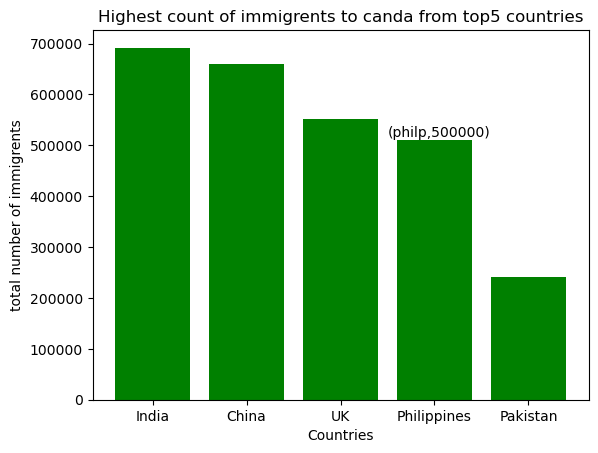

In [20]:
fig, ax = plt.subplots()

ax.bar(names, df_top_5["Total"], color = 'green')
ax.set_title("Highest count of immigrents to canda from top5 countries")
ax.set_xlabel("Countries")
ax.set_ylabel("total number of immigrents")
ax.annotate("(philp,500000)", xy = (2.5, 510000), va = "bottom", ha = "left", rotation = 0) # just checking annotate 


plt.show()


In [21]:
# Histogram

"""
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins,
assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the 
y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it 
so that the distribution is displayed nicely.
"""


# Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?


df_country = df.groupby(['Country'])['2013'].sum().reset_index()
df_country


,Country,2013
0,Afghanistan,2004
1,Albania,603
2,Algeria,4331
3,American Samoa,0
4,Andorra,1
...,...,...
190,Viet Nam,2112
191,Western Sahara,0
192,Yemen,217
193,Zambia,59


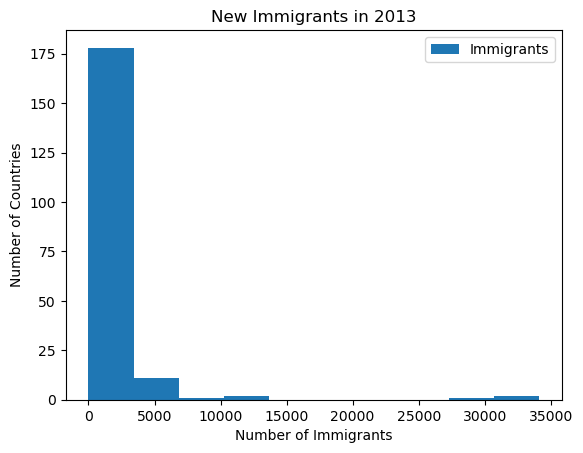

In [22]:
fig, ax = plt.subplots()
ax.hist(df_country["2013"])
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])


plt.show()

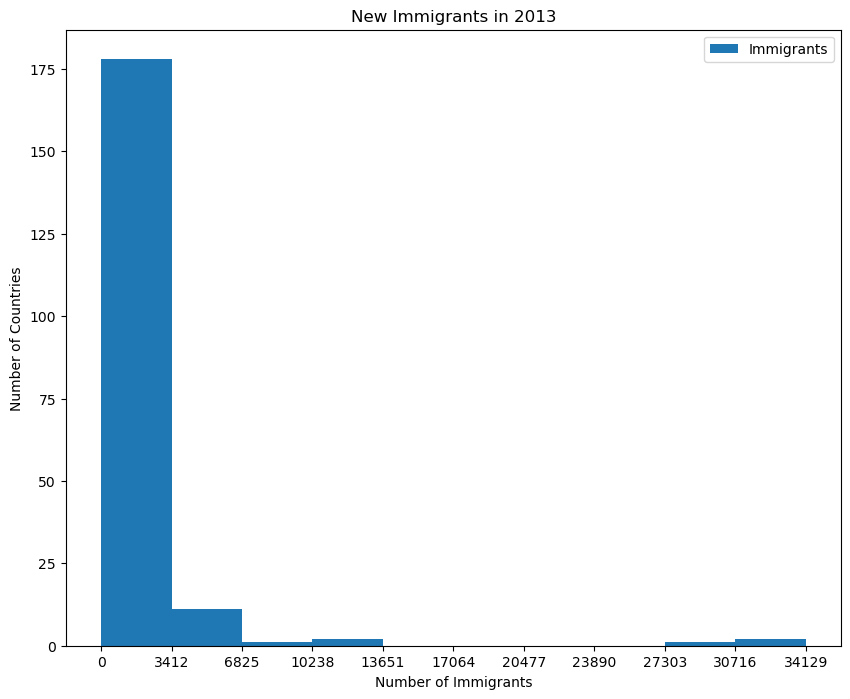

In [23]:
"""
Our plot doesnot match with the bars
By default, the histrogram method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency 
distribution of immigration in 2013
The hist function retuns list of arrays with 1. counts and 2. bins. we can fetch that using unpacking functionality
and further use the bins as x-ticks
"""

fig, ax = plt.subplots(figsize = (10,8))

count = ax.hist(df_country["2013"])

#you can check the arrays in count with indexing count[0] for count, count[1] for bins

ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int, count[1])))
ax.legend(['Immigrants'])


plt.show()

In [24]:
# We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.
#What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

df_1 = df.groupby(['Country'])[years].sum().reset_index()
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns = df_dns.T
df_dns.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


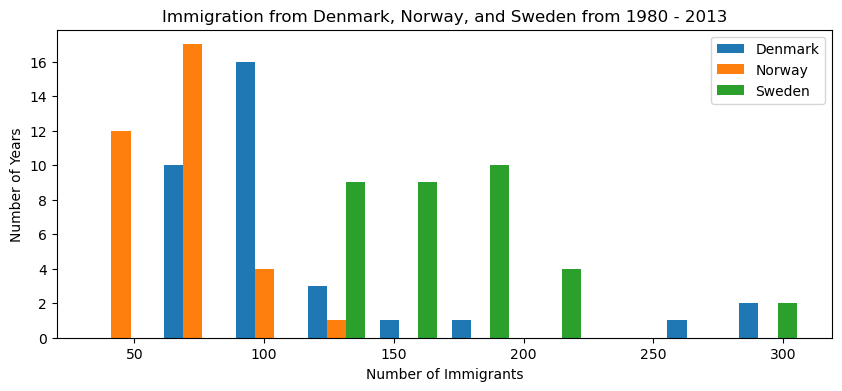

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

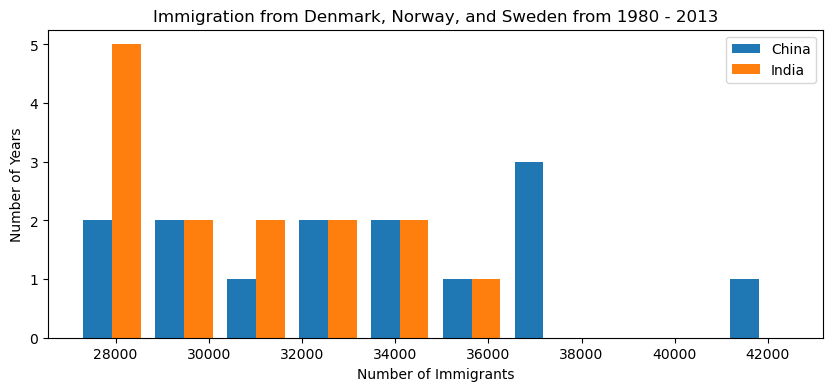

In [26]:
df_can=df.groupby(['Country'])[years].sum()
y=list(map(str,range(2000, 2014)))
df_ci=df_can.loc[['China', 'India'], y]
df_ci=df_ci.T
#df_ci
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_ci)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['China', 'India'])
#Display the plot
plt.show()


In [27]:
#Pie Chart
"""
A pie chart represents the proportion or percentage distribution of different categories in a dataset using sectors of a circular pie.
Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985
"""
total = total_immigrents[0:5]
print(total)
labels = years[0:5]
labels

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64


['1980', '1981', '1982', '1983', '1984']

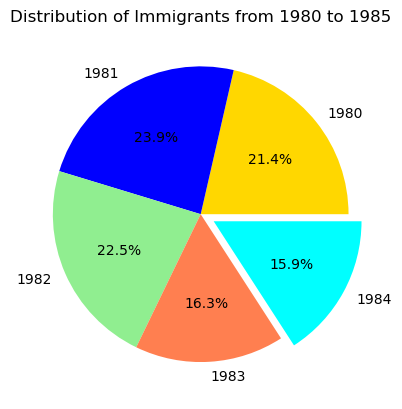

In [28]:
fig, ax = plt.subplots()

ax.pie(total_immigrents[0:5], labels = years[0:5], autopct = '%1.1f%%', explode = [0,0,0,0,0.1],colors = ['gold','blue','lightgreen','coral','cyan'],)
ax.set_aspect('equal')
plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels
plt.show()

In [29]:
#Question: Create a pie chart representing the total immigrants proportion for each continent


df_continent = df.groupby(["Continent"])["Total"].sum().reset_index()
labels = list(df_continent.Continent)
labels[3] = "L.Amarica"
labels

['Africa', 'Asia', 'Europe', 'L.Amarica', 'Northern America', 'Oceania']

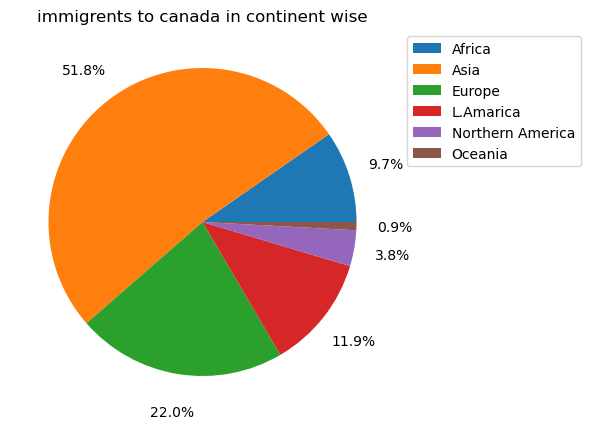

In [30]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.pie(df_continent['Total'], autopct ='%1.1f%%', pctdistance = 1.25)
ax.set_title("immigrents to canada in continent wise")
ax.legend(labels, bbox_to_anchor = (1, 0, 0.5, 1))
plt.show()
             

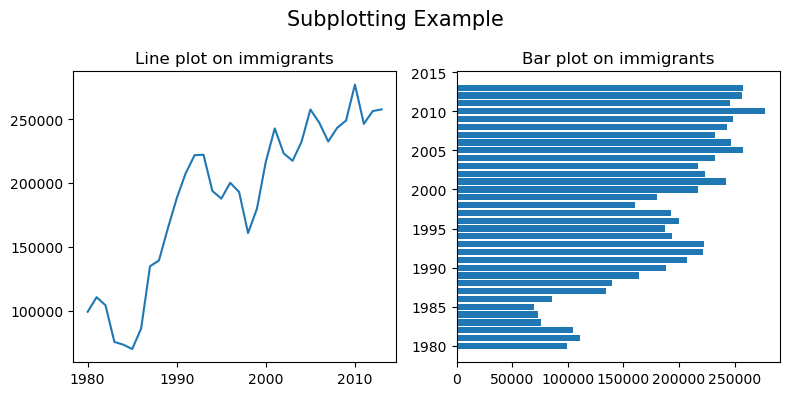

In [38]:
# Sub-plotting

"""
Let us explore how to display more than one plot on the same figure and specify the number of rows and columns to be created to the 
subplots function.

For instance, let’s create a line and scatter plot in one row
plt.subplots()
You can use the same functions using which you plotte lne and scatter plots at the start of this lab
Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, assign the ‘Sharey’ parameter as True in 
the code below. Also notice the use of 'suptitle'
"""

#You can also implement the subplotting with add_subplot() as below:-

# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrents)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrents.index, total_immigrents) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

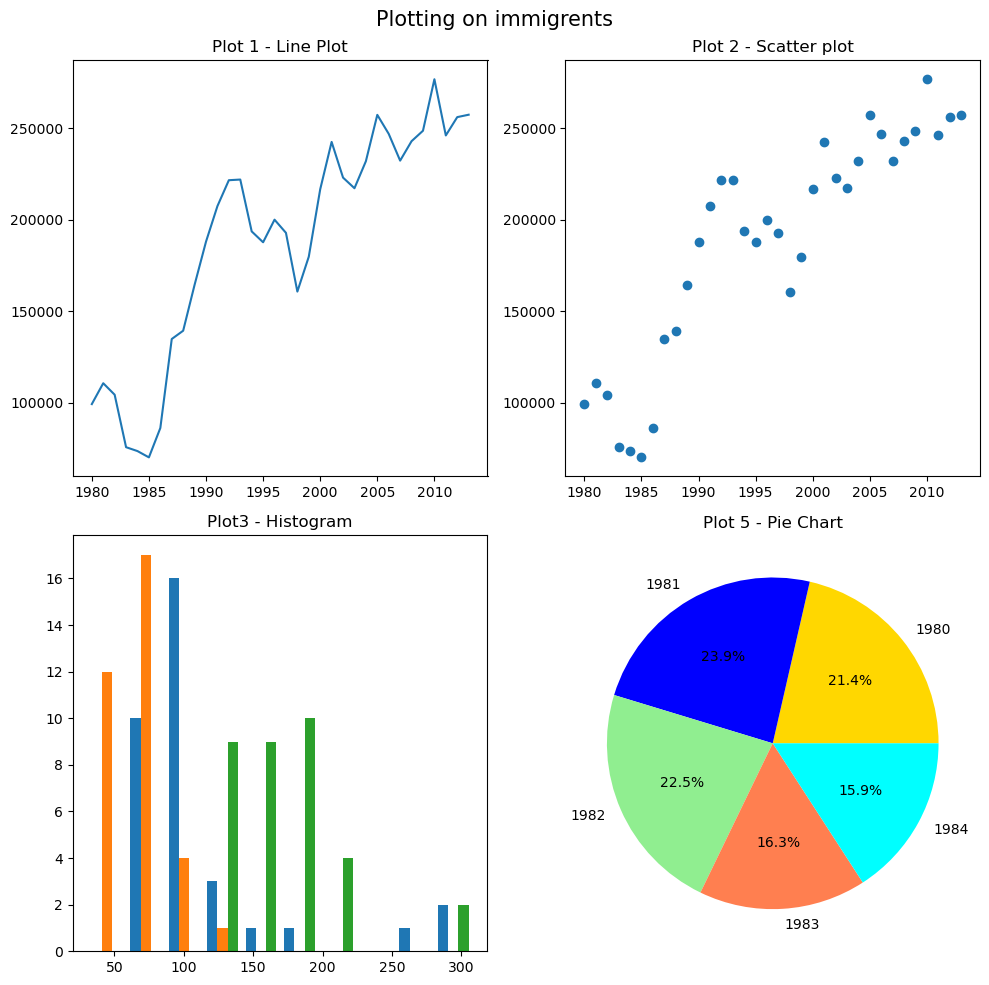

In [40]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize = (10,10))

#Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrents)
ax1.set_title('Plot 1 - Line Plot')

# Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrents.index, total_immigrents)
ax2.set_title("Plot 2 - Scatter plot")

# Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)
ax3.set_title('Plot3 - Histogram')


# Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(total_immigrents[0:5], labels=years[0:5], 
           colors = ['gold','blue','lightgreen','coral','cyan'],
           autopct='%1.1f%%')
ax4.set_aspect('equal')
ax4.set_title('Plot 5 - Pie Chart')


fig.suptitle("Plotting on immigrents", fontsize = 15)

# Adjust spacing between subplots
fig.tight_layout()

plt.show()